## Observations and Insights 

In [35]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combodf = study_results.merge(mouse_metadata, left_on='Mouse ID', right_on='Mouse ID')
combodf.columns = ['Mouse_ID', 'Timepoint', 'Tumor_Volume(mm3)', 'Metastatic_Sites',
       'Drug_Regimen', 'Sex', 'Age_months', 'Weight_(g)']

# Display the data table for preview
combodf

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [36]:
# Checking the number of mice.
combodf.Mouse_ID.nunique()

249

In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
combodf.loc[combodf.duplicated(subset=['Mouse_ID','Timepoint']),'Mouse_ID'].unique()

array(['g989'], dtype=object)

In [38]:
# Optional: Get all the data for the duplicate mouse ID. 
dupmice = combodf.loc[combodf["Mouse_ID"] == "g989", :]
dupmice

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [39]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleandf = combodf[combodf.Mouse_ID != 'g989']
cleandf

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [40]:
# Checking the number of mice in the clean DataFrame.
cleandf.Mouse_ID.nunique()

248

## Summary Statistics

In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = cleandf['Tumor_Volume(mm3)'].groupby(cleandf['Drug_Regimen']).mean()
median = cleandf['Tumor_Volume(mm3)'].groupby(cleandf['Drug_Regimen']).median()
stdv = cleandf['Tumor_Volume(mm3)'].groupby(cleandf['Drug_Regimen']).std()
variance = cleandf['Tumor_Volume(mm3)'].groupby(cleandf['Drug_Regimen']).var()
SEM = cleandf['Tumor_Volume(mm3)'].groupby(cleandf['Drug_Regimen']).sem()


# Assemble the resulting series into a single summary dataframe.
grpbydf= pd.DataFrame({"mean":mean,"median":median,"std_dev":stdv,"variance":variance,"Std_Error":SEM})
grpbydf

,mean,median,std_dev,variance,Std_Error
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [42]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggdf= grpbydf.agg({'mean':'mean','median':'median','std_dev':'std','variance':'var','Std_Error':'sem'})
aggdf

mean          50.975982
median        51.819532
std_dev        1.216096
variance     256.269612
Std_Error      0.032721
dtype: float64

## Bar and Pie Charts

0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Timepoint, dtype: int64

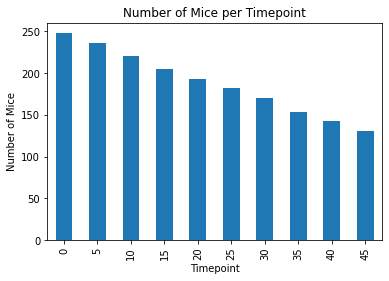

In [43]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepointdf = cleandf.Timepoint.value_counts()

timepointdf.plot.bar()
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Timepoint")
timepointdf

Text(0, 0.5, 'Number of Mice')

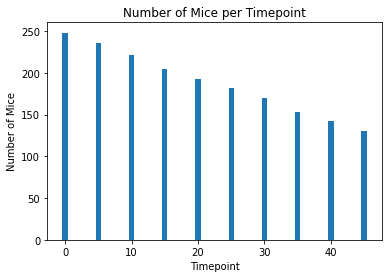

In [44]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
xaxis = timepointdf.index.values
yaxis = timepointdf.values

plt.bar(xaxis, yaxis)
plt.title("Number of Mice per Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Number of Mice")

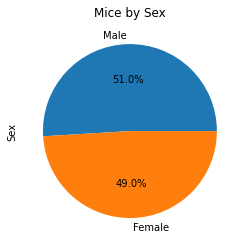

Male      958
Female    922
Name: Sex, dtype: int64

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sexdata = cleandf["Sex"].value_counts()
plt.title("Mice by Sex")
sexdata.plot.pie(autopct= "%1.1f%%")
plt.show()
sexdata

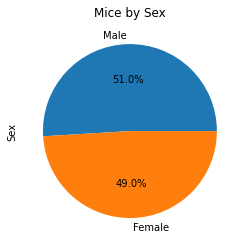

In [46]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female', 'Male']
plot = sexdata.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.title('Mice by Sex')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [47]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capdf = cleandf.loc[cleandf.Drug_Regimen == "Capomulin",:]
Ramdf = cleandf.loc[cleandf.Drug_Regimen == "Ramicane", :]
Infdf = cleandf.loc[cleandf.Drug_Regimen == "Infubinol", :]
Ceftdf = cleandf.loc[cleandf.Drug_Regimen == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse
Cap1 = Capdf.groupby('Mouse_ID').max()['Timepoint']
CapTumFin = pd.DataFrame(Cap1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capmrg = pd.merge(CapTumFin, cleandf, on=("Mouse_ID","Timepoint"),how="left")

#ram
Ram1 = Ramdf.groupby('Mouse_ID').max()['Timepoint']
RamTumFin = pd.DataFrame(Ram1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Rammrg = pd.merge(RamTumFin, cleandf, on=("Mouse_ID","Timepoint"),how="left")


#inf
Inf1 = Infdf.groupby('Mouse_ID').max()['Timepoint']
InfTumFin = pd.DataFrame(Inf1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Infmrg = pd.merge(InfTumFin, cleandf, on=("Mouse_ID","Timepoint"),how="left")

#ceft
Ceft1 = Ceftdf.groupby('Mouse_ID').max()['Timepoint']
CeftTumFin = pd.DataFrame(Ceft1)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Ceftmrg = pd.merge(CeftTumFin, cleandf, on=("Mouse_ID","Timepoint"),how="left")



totaltreat = pd.concat([Rammrg,Capmrg,Infmrg,Ceftmrg])
totaltreat


,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
0,a411,45,38.407618,1,Ramicane,Male,3,22
1,a444,45,43.047543,0,Ramicane,Female,10,25
2,a520,45,38.810366,1,Ramicane,Male,13,21
3,a644,45,32.978522,1,Ramicane,Female,7,17
4,c458,30,38.342008,2,Ramicane,Female,23,20
...,...,...,...,...,...,...,...,...
20,x226,0,45.000000,0,Ceftamin,Male,23,28
21,x581,45,64.634949,3,Ceftamin,Female,19,28
22,x822,45,61.386660,3,Ceftamin,Male,3,29
23,y769,45,68.594745,4,Ceftamin,Female,6,27


In [110]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = list(totaltreat.Drug_Regimen.unique())
dflist =[Rammrg, Capmrg, Infmrg, Ceftmrg]
newdfs = dict()
for i in range(4):
    newdfs[i] = dflist[i]['Tumor_Volume(mm3)']
  
    
# Create empty list to fill with tumor vol data (for plotting)
tumorvol = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
for i in range(len(newdfs)):
    quartiles = newdfs[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print('------------')
    print(f"{drugs[i]}")
    print('')
    print(f"lower quartile of {drugs[i]} tumors: {lowerq}")
    print(f"upper quartile of {drugs[i]} tumors: {upperq}")
    print(f"interquartile range of {drugs[i]} tumors: {iqr}")
    print(f"median of {drugs[i]} tumors: {quartiles[0.5]} ")

    lwr_bound = lowerq - (1.5*iqr)
    upr_bound = upperq + (1.5*iqr)

    print(f"Values below {lwr_bound} maybe outliers.")
    print(f"Values above {upr_bound} maybe outliers.")
    print('')
    
    criteria = pd.DataFrame(newdfs[i])[ newdfs[i].iloc[:,]<= lwr_bound ]
    criteria = pd.DataFrame(newdfs[i])[ newdfs[i].iloc[:,]>= upr_bound ]
    #I keep getting an error "too many indexers" when I try to enter a column in ".iloc[:,]"
    #based on the box and whisker, inf should be returning something
    print('Lower Outliers:')
    print(criteria)
    print('Upper Outliers:')
    print(criteria)
    

    
    #print possible outliers
    #print('')
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

------------
Ramicane

lower quartile of Ramicane tumors: 31.56046955
upper quartile of Ramicane tumors: 40.65900627
interquartile range of Ramicane tumors: 9.098536719999998
median of Ramicane tumors: 36.56165229 
Values below 17.912664470000003 maybe outliers.
Values above 54.30681135 maybe outliers.

Lower Outliers:
Empty DataFrame
Columns: [Tumor_Volume(mm3)]
Index: []
Upper Outliers:
Empty DataFrame
Columns: [Tumor_Volume(mm3)]
Index: []
------------
Capomulin

lower quartile of Capomulin tumors: 32.37735684
upper quartile of Capomulin tumors: 40.1592203
interquartile range of Capomulin tumors: 7.781863460000004
median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 maybe outliers.
Values above 51.83201549 maybe outliers.

Lower Outliers:
Empty DataFrame
Columns: [Tumor_Volume(mm3)]
Index: []
Upper Outliers:
Empty DataFrame
Columns: [Tumor_Volume(mm3)]
Index: []
------------
Infubinol

lower quartile of Infubinol tumors: 54.04860769
upper quartile of Infubinol tumo

In [100]:
#convert newdfs from dict to list
newdfslist = []
for i in newdfs.values():
    newdfslist.append(i)


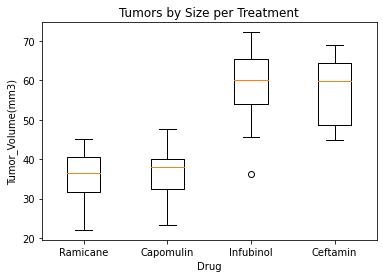

In [96]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#data_to_plot=data_to_plot.values
fig1, ax1 = plt.subplots()
ax1.set_title('Tumors by Size per Treatment')
ax1.set_ylabel('Tumor_Volume(mm3)')
ax1.set_xlabel('Drug')
ax1.boxplot(newdfslist, labels=drugs, widths = 0.4, vert=True)
plt.show()

## Line and Scatter Plots

In [99]:
Capmrg

,Mouse_ID,Timepoint,Tumor_Volume(mm3),Metastatic_Sites,Drug_Regimen,Sex,Age_months,Weight_(g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
5,i557,45,47.685963,1,Capomulin,Female,1,24
6,i738,45,37.311846,2,Capomulin,Female,23,20
7,j119,45,38.125164,1,Capomulin,Female,7,23
8,j246,35,38.753265,1,Capomulin,Female,21,21
9,l509,45,41.483008,3,Capomulin,Male,17,21


Text(0, 0.5, 'Tumor_Volume(mm3)')

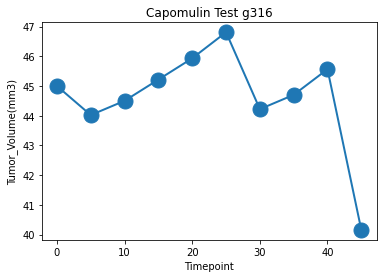

In [104]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
forline_df = Capdf.loc[Capdf["Mouse_ID"] == "g316",:]
forline_df.head()
x_axis = forline_df["Timepoint"]
tumsiz = forline_df["Tumor_Volume(mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin Test g316')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",label="Fahreneit")
plt.xlabel('Timepoint')
plt.ylabel('Tumor_Volume(mm3)')

Text(0, 0.5, 'Tumor_Volume(mm3)')

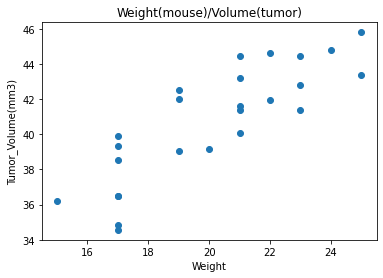

In [112]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
avgcap =Capdf.groupby(['Mouse_ID']).mean()

marker_size=30
plt.scatter(avgcap['Weight_(g)'],avgcap['Tumor_Volume(mm3)'])
plt.title('Weight(mouse)/Volume(tumor)')
plt.xlabel('Weight')
plt.ylabel('Tumor_Volume(mm3)')

## Correlation and Regression

In [113]:
# Calculate the correlation coefficient and linear regression model 
cor = st.pearsonr(avgcap['Weight_(g)'],avgcap['Tumor_Volume(mm3)'])
print(cor)


(0.841936342469472, 1.3225722434712483e-07)
